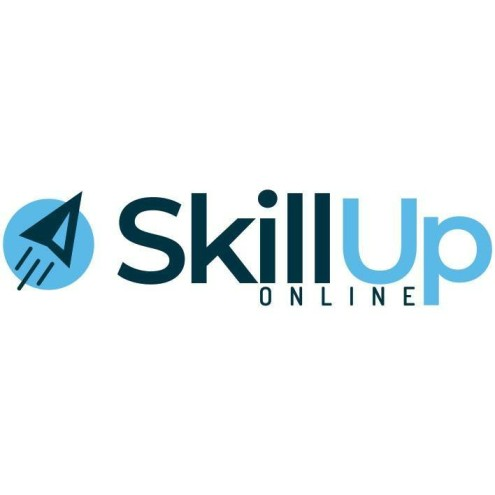

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Trabajo realizado por Belén López-Montenegro Ordóñez

### Importa las bibliotecas necesarias

In [120]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [121]:
# Organizar los datos en un dataframe
dataframe= pd.read_csv('creditcard.csv')

In [122]:
dataframe.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

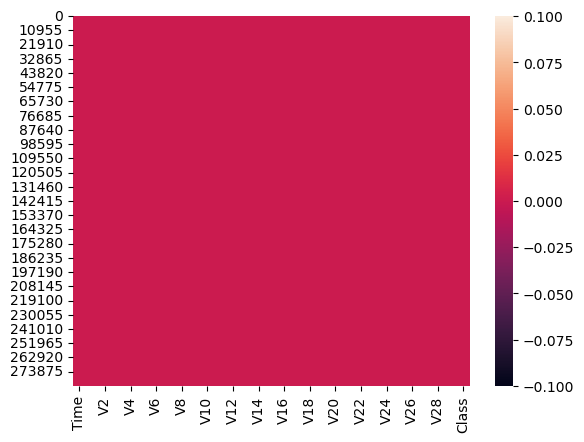

In [123]:
#"Devuelve True cuando el dato es NULL, Mostramos en color claro los Nulos
dataframe.isnull()
sns.heatmap(dataframe.isnull())
plt.show()

In [124]:
# Verificar valores perdidos en el dataframe
valores_perdidos = dataframe.isnull().sum()
print("Valores perdidos en cada columna:\n", valores_perdidos)


Valores perdidos en cada columna:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


El resultado muestra que ninguna columna tiene valores perdidos (0 en todas las columnas), lo que significa que el conjunto de datos está completo y no tiene valores faltantes.

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [125]:
# Contar el número total de filas antes de eliminar duplicados
total_filas_antes = dataframe.shape[0]
print("Número total de filas antes de eliminar duplicados:", total_filas_antes)


Número total de filas antes de eliminar duplicados: 284807


In [126]:
# Verificar filas duplicadas en el dataframe
datos_duplicados = dataframe.duplicated().sum()
print("Número de filas duplicadas:", datos_duplicados)


Número de filas duplicadas: 1081


In [127]:
# Eliminar filas duplicadas
dataframe = dataframe.drop_duplicates()

In [128]:
# Verificar el número de filas después de eliminar duplicados
total_filas_despues = dataframe.shape[0]
print("Número de filas después de eliminar duplicados:", dataframe.shape[0])

Número de filas después de eliminar duplicados: 283726


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [129]:
dataframe['Class'].unique()

array([0, 1], dtype=int64)

In [130]:
# Calcula el porcentaje de transacciones fraudulentas
transacciones_fraudulentas = dataframe[dataframe['Class'] == 1].shape[0]

# Muestra el porcentaje de transacciones fraudulentas
porcentaje_fraudulentas = (transacciones_fraudulentas / total_filas_despues) * 100
print("Porcentaje de transacciones fraudulentas: {:.2f}%".format(porcentaje_fraudulentas))

Porcentaje de transacciones fraudulentas: 0.17%


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [131]:
# Filtrar las transacciones fraudulentas
transacciones_fraudulentas_df=dataframe[dataframe['Class']==1]
# Calcula el importe medio de las transacciones fraudulentas
importe_medio_fraudulentas = transacciones_fraudulentas_df['Amount'].mean()
# Muestra el importe medio de las transacciones fraudulentas
print("Importe medio de las transacciones fraudulentas: {:.2f}".format(importe_medio_fraudulentas))

Importe medio de las transacciones fraudulentas: 123.87


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

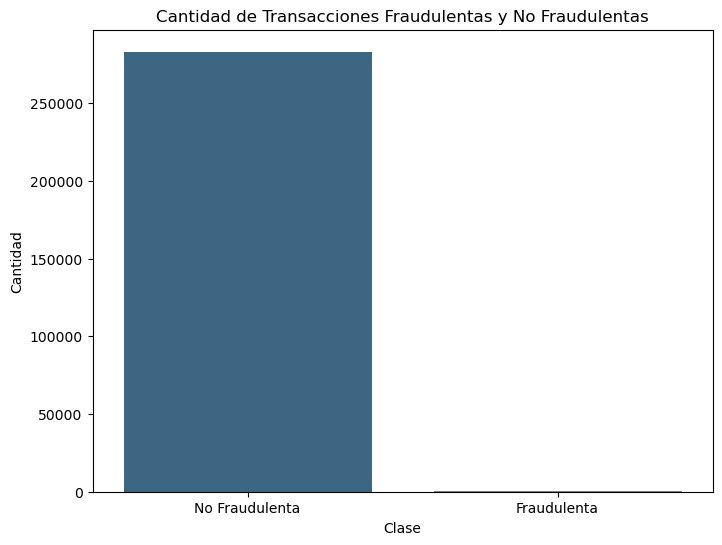

In [132]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
# Contar las transacciones por clase
conteo_clases = dataframe['Class'].value_counts()

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette='viridis')
plt.title('Cantidad de Transacciones Fraudulentas y No Fraudulentas')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


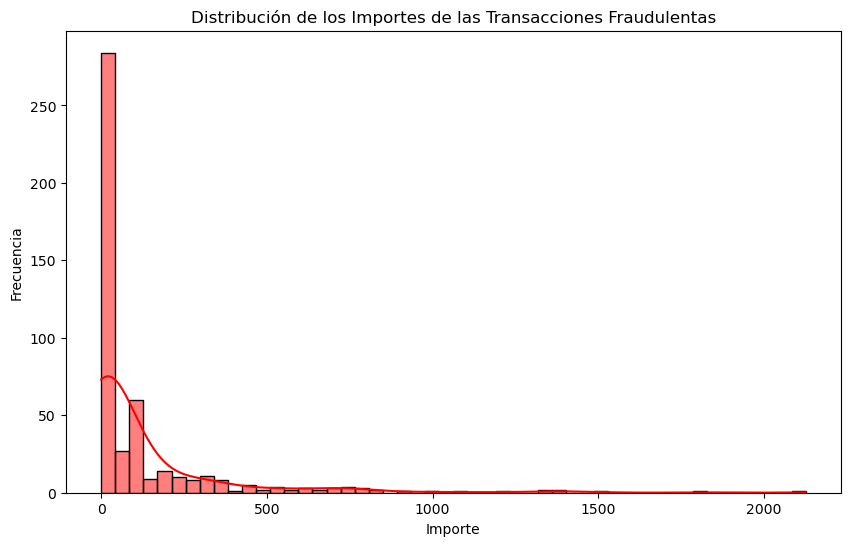

In [133]:
# Separa los datos de transacciones fraudulentas
   #Tengo ya esta separacion de la pregunta 2 -->transacciones_fraudulentas_df=dataframe[dataframe['Class']==1]
# Muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(10, 6))
sns.histplot(transacciones_fraudulentas_df['Amount'], bins=50, kde=True, color='red')
plt.title('Distribución de los Importes de las Transacciones Fraudulentas')
plt.xlabel('Importe')
plt.ylabel('Frecuencia')
plt.show()

Conclusión: El gráfico muestra la distribución de los importes de las transacciones fraudulentas en el conjunto de datos. La mayoría de estas transacciones tienen importes bajos, con una alta concentración cerca de cero. La curva de densidad (kde) superpuesta indica que a medida que el importe aumenta, la frecuencia de las transacciones fraudulentas disminuye rápidamente. Esto sugiere que las transacciones fraudulentas tienden a ser de menor valor.

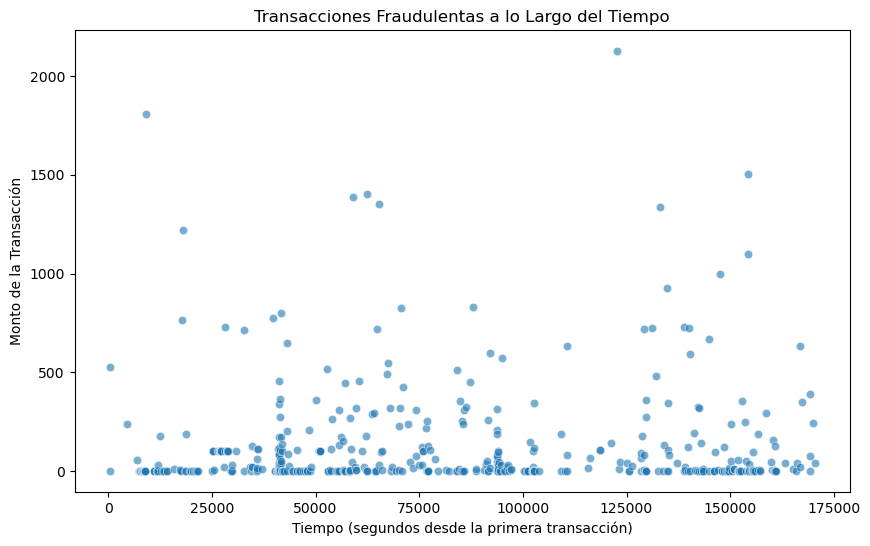

In [134]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=transacciones_fraudulentas_df, alpha=0.6, palette='viridis')

plt.title('Transacciones Fraudulentas a lo Largo del Tiempo')
plt.xlabel('Tiempo (segundos desde la primera transacción)')
plt.ylabel('Monto de la Transacción')
plt.show()

Conclusion: El gráfico de dispersión muestra la distribución de los montos de las transacciones fraudulentas a lo largo del tiempo. Cada punto representa una transacción fraudulenta, con el eje x indicando el tiempo en segundos desde la primera transacción y el eje y mostrando el monto de la transacción. La mayoría de los montos se concentran en valores bajos, sin un patrón claro en relación con el tiempo. Esto sugiere que las transacciones fraudulentas ocurren de manera dispersa a lo largo del tiempo, con variaciones en los montos.

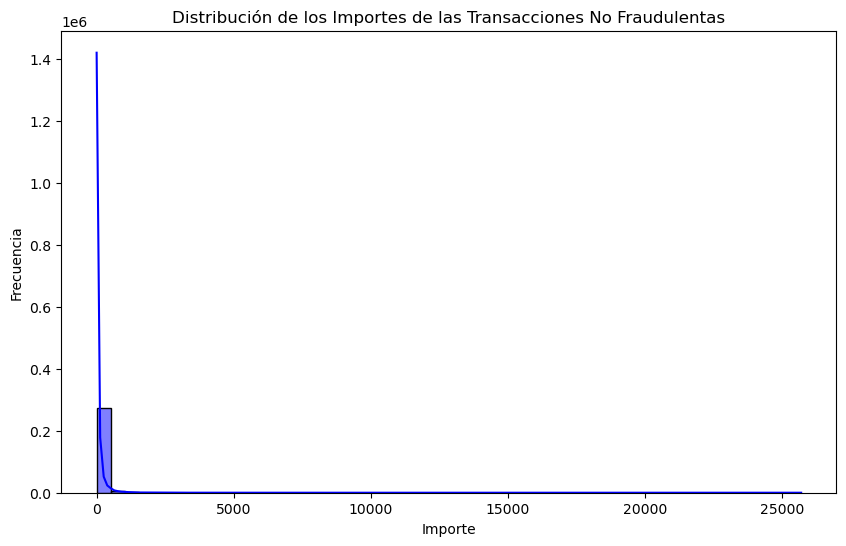

In [135]:
# Distribución de los importes de las transacciones no fraudulentas
transacciones_no_fraudulentas_df = dataframe[dataframe['Class'] == 0]
plt.figure(figsize=(10, 6))
sns.histplot(transacciones_no_fraudulentas_df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribución de los Importes de las Transacciones No Fraudulentas')
plt.xlabel('Importe')
plt.ylabel('Frecuencia')
plt.show()

Conclusión: El gráfico muestra la distribución de los importes de las transacciones no fraudulentas. La mayoría de estas transacciones tienen importes muy bajos, con una alta concentración cerca de cero, similar a lo observado en las transacciones fraudulentas. Sin embargo, las transacciones no fraudulentas incluyen algunas con importes significativamente mayores, aunque estas son mucho menos frecuentes. La curva de densidad (kde) en azul superpuesta refuerza que la mayoría de las transacciones no fraudulentas son de menor valor

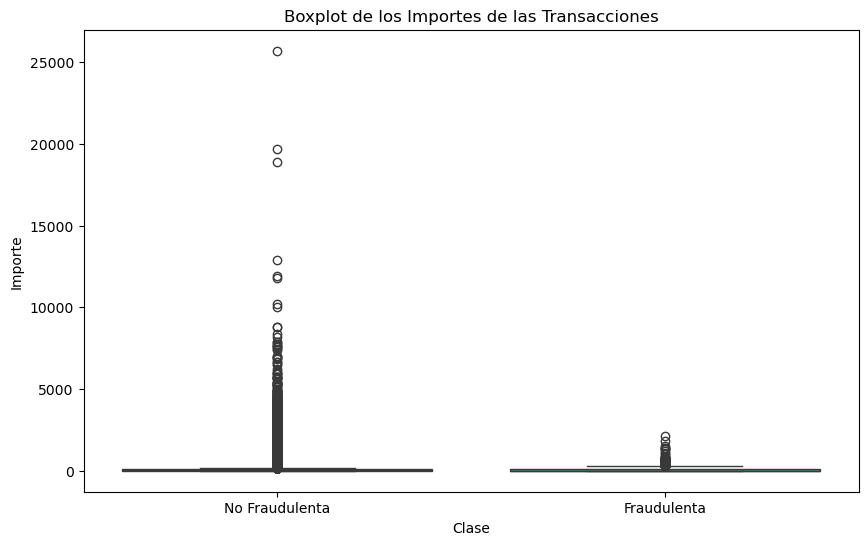

In [136]:
# Boxplot de los importes de las transacciones fraudulentas y no fraudulentas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=dataframe, palette='viridis')
plt.title('Boxplot de los Importes de las Transacciones')
plt.xlabel('Clase')
plt.ylabel('Importe')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'])
plt.show()

Conclusión: El gráfico boxplot compara los importes de las transacciones fraudulentas y no fraudulentas. Muestra que los importes de las transacciones no fraudulentas tienen una mayor dispersión y algunos valores extremadamente altos (outliers), mientras que los importes de las transacciones fraudulentas son generalmente más bajos y están más concentrados cerca del valor mediano. Esto indica que, en general, las transacciones fraudulentas tienden a ser de menor monto en comparación con las no fraudulentas.

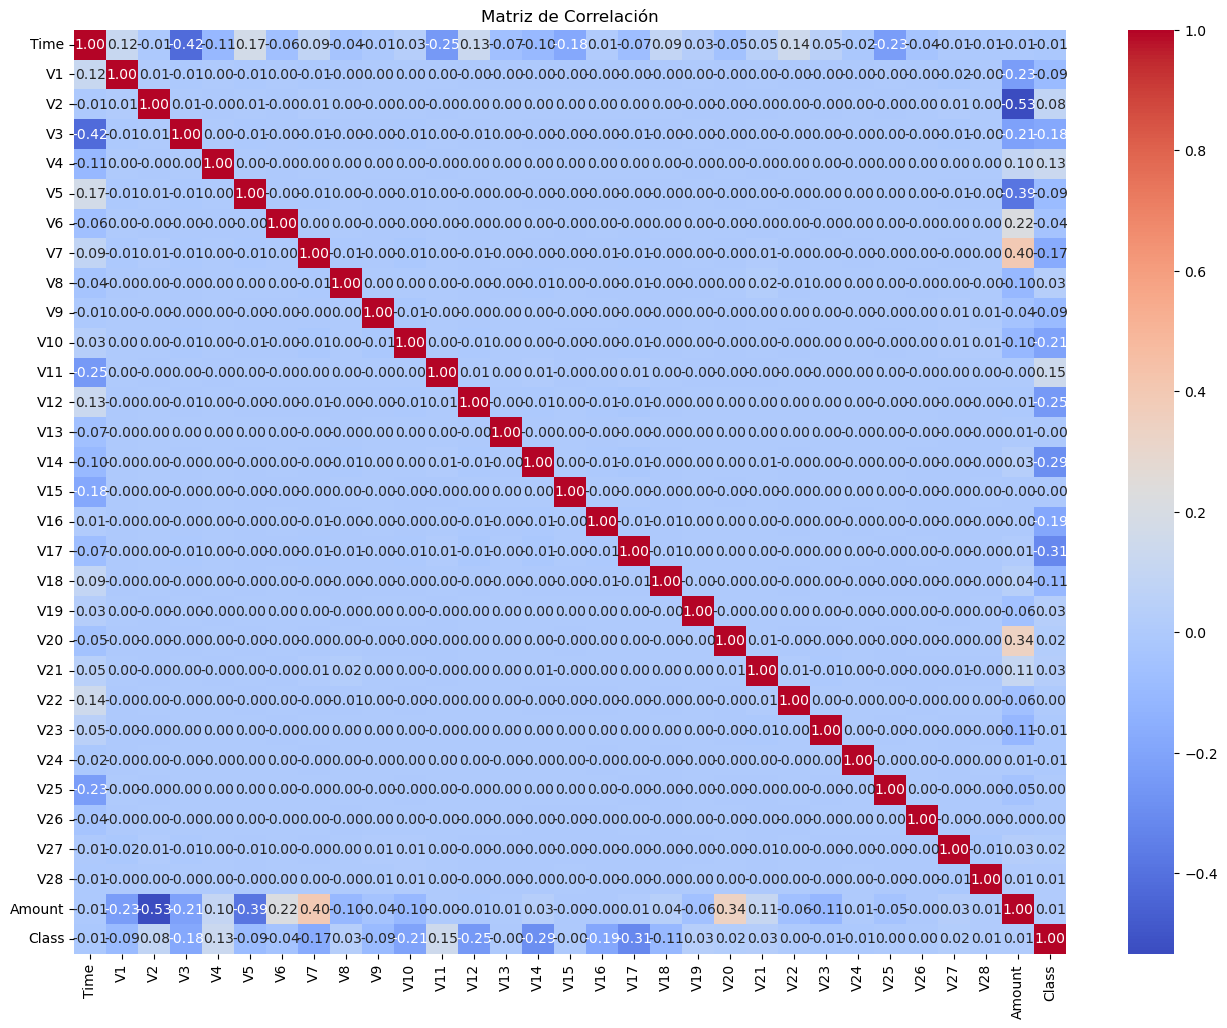

In [137]:
# Matriz de correlación
plt.figure(figsize=(16, 12))
correlation_matrix = dataframe.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Conclusion: El uso de un mapa de colores (cmap 'coolwarm') facilita la identificación de patrones de correlación: las áreas en rojo intenso representan correlaciones positivas fuertes, mientras que las áreas en azul intenso representan correlaciones negativas fuertes. El gráfico es útil para identificar relaciones significativas entre variables que podrían ser importantes para el análisis y la modelación de fraudes en tarjetas de crédito.

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [138]:
# Separa los datos de entrenamiento y evaluación
X=dataframe.drop('Class', axis=1)
y=dataframe['Class']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=45)

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

### Modelo Randon Forest


In [141]:
#Escribe tu código aquí
from sklearn.ensemble import RandomForestClassifier

In [142]:
# Crear una instancia del clasificador RandomForest
# Configurando los hiperparámetros max_depth y random_state
randomforest= RandomForestClassifier(max_depth=150, random_state=42)

In [143]:
# Entrenar el modelo con los datos de entrenamiento
randomforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=150, random_state=42)

In [144]:
# Realizar predicciones en los datos de prueba
predicciones= randomforest.predict(X_test)

In [145]:
# Importar las bibliotecas y clases necesarias
from sklearn.metrics import classification_report, accuracy_score

In [146]:
# Evaluar el modelo utilizando classification_report y accuracy_score
report = classification_report(y_test, predicciones)
accuracy = accuracy_score(y_test, predicciones)

In [147]:
# Mostrar los resultados
print("Classification Report:\n", report)
print("Accuracy Score:", accuracy * 100, "%")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56665
           1       0.86      0.70      0.78        81

    accuracy                           1.00     56746
   macro avg       0.93      0.85      0.89     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy Score: 99.94184612131252 %


El modelo Random Forest tiene una precisión general del 99.94%, detectando casi todas las transacciones no fraudulentas correctamente, pero con menor eficacia en la detección de transacciones fraudulentas (recall del 70%).

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>

### Modelo SVC o Maquina de vectores de soportes

In [160]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

#Datos estén escalados. SVM tiende a funcionar mejor y más rápido cuando los datos están escalados a una escala uniforme
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [161]:
# Crear una instancia del clasificador SVC
modelo_svc = SVC(gamma='scale', probability=True)


In [162]:
# Entrenar el modelo con los datos de entrenamiento de la muestra
modelo_svc.fit(X_train_scaled, y_train)

SVC(probability=True)

In [163]:
# Realizar predicciones en los datos de prueba de la muestra
predicciones_svc = modelo_svc.predict(X_test_scaled)

In [166]:
print(classification_report(y_test, predicciones_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56665
           1       0.87      0.59      0.71        81

    accuracy                           1.00     56746
   macro avg       0.94      0.80      0.85     56746
weighted avg       1.00      1.00      1.00     56746



In [165]:
print("Accuracy Score:",  (accuracy_score(y_test, predicciones_svc)) * 100, "%")

Accuracy Score: 99.92951045007578 %


El modelo SVC tiene una precisión general de 99,92%, detectando casi todas las no fraudulentas de forma correcta, pero con una precisión mucho menor en las fraudulentas (recall 59%)
